<a href="https://colab.research.google.com/github/AlaaAshraf309/NTI_Tasks/blob/main/CNN_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub

import kagglehub


path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/flowers-recognition


In [2]:
import os
print(os.listdir(path))

['flowers']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 128
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train = datagen.flow_from_directory(
    os.path.join(path, "flowers"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val = datagen.flow_from_directory(
    os.path.join(path, "flowers"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)



Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=l2(0.001), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fully connected
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output
model.add(Dense(train.num_classes, activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,762,501 (33.43 MB)

 Trainable params: 8,761,349 (33.42 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [5]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train,
    epochs=30,
    validation_data=val,
    callbacks=[earlystop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 64s 482ms/step - accuracy: 0.4206 - loss: 2.4096 - val_accuracy: 0.2442 - val_loss: 4.2764
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - accuracy: 0.5432 - loss: 1.8448 - val_accuracy: 0.2453 - val_loss: 4.6873
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 27s 246ms/step - accuracy: 0.5850 - loss: 1.6953 - val_accuracy: 0.2581 - val_loss: 3.6764
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - accuracy: 0.6002 - loss: 1.6731 - val_accuracy: 0.3372 - val_loss: 2.8851
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 238ms/step - accuracy: 0.6075 - loss: 1.6517 - val_accuracy: 0.5547 - val_loss: 1.7911
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 236ms/step - accuracy: 0.6369 - loss: 1.5566 - val_accuracy: 0.6140 - val_loss: 1.5299
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 240ms/step - accuracy: 0.6504 - loss: 1.5258 - val_accuracy: 0.6442 - val_loss: 1.4673
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 236ms/step - accuracy: 0.6472 - loss: 1

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.6627 - loss: 1.5094
Validation Loss: 1.4576
Validation Accuracy: 0.6837


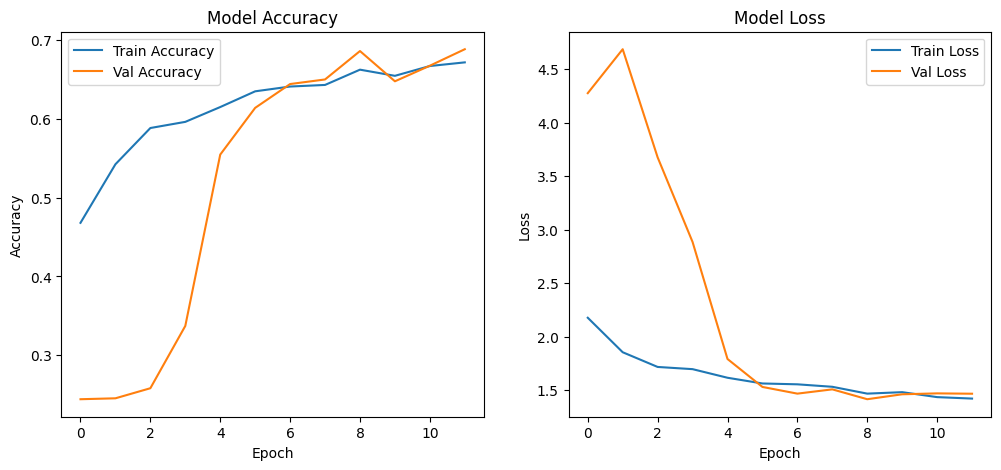

In [6]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()